In [2]:
import numpy as np
import matplotlib.pyplot as plt


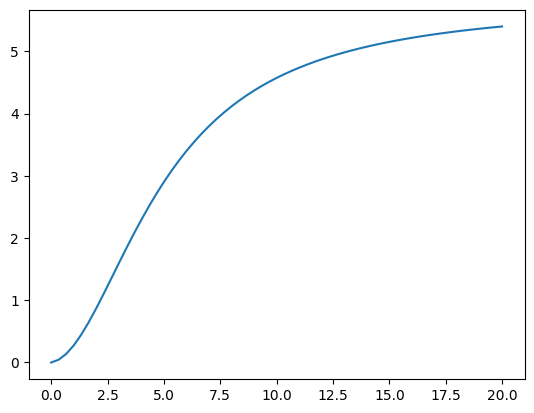

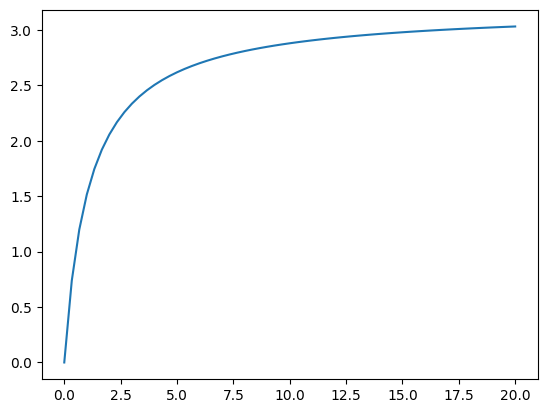

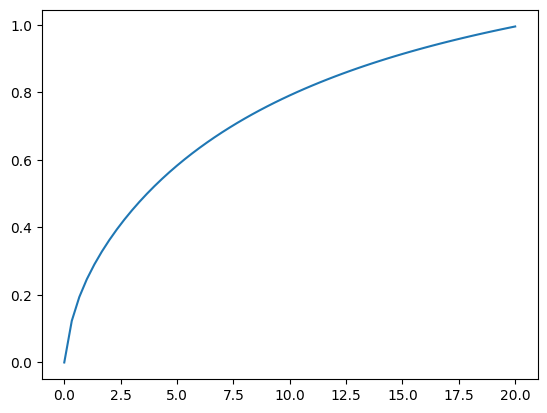

In [3]:
def Arr(T, dH, T_ref):
    in_exp = dH/8.3145*(1/T - 1/T_ref)
    thet = np.exp(in_exp)
    return thet


# =-=-=-=-=-=-=-=-=-=-=-=-= #
# =- Isotherm example 01 -= #
# =-=-=-=-=-=-=-=-=-=-=-=-= #
# Quadratic
qm1 = 2.9   # mol/kg
K1 = 0.02   # bar^-1
K2 = 0.04   # bar^-2
dH1 = 12000 # J/mol
T_ref1 = 300
def iso1(P, T): # Quadratic
    P_norm = P*Arr(T, dH1, T_ref1)
    numer = qm1*(K1*P_norm + 2*K2*P_norm**2)
    denom = 1 + K1*P_norm + K2*P_norm**2
    q = numer/denom
    return q
# testiso1
P_dom = np.linspace(0,20,61)
q1_res = iso1(P_dom, 300)
plt.plot(P_dom, q1_res)
plt.show()

# =-=-=-=-=-=-=-=-=-=-=-=-= #
# =- Isotherm example 02 -= #
# =-=-=-=-=-=-=-=-=-=-=-=-= #
# Langmuir
qm2 = 3.2   # mol/kg @ 300 K
b2 = 0.9   # bar^-1  @ 300 K
dH2 = 9500 # J/mol
T_ref2 = 300

def iso2(P, T): # Langmuir
    P_norm = P*Arr(T, dH2, T_ref2)
    q = qm2*b2*P_norm/(1+b2*P_norm)
    return q
P_dom = np.linspace(0,20,61)
q2_res = iso2(P_dom, 300)
plt.plot(P_dom, q2_res)
plt.show()

# =-=-=-=-=-=-=-=-=-=-=-=-= #
# =- Isotherm example 03 -= #
# =-=-=-=-=-=-=-=-=-=-=-=-= #
# Dual-site
qm3_1 = 0.2   # mol/kg @ 300 K
qm3_2 = 1.2   # mol/kg @ 300 K
b3_1 = 2.2   # bar^-1  @ 300 K
b3_2 = 0.1   # bar^-1  @ 300 K

dH3 = 9500 # J/mol
T_ref3 = 300

def iso3(P, T): # Langmuir
    P_norm = P*Arr(T, dH3, T_ref3)
    q = qm3_1*b3_1*P_norm/(1+b3_1*P_norm) + qm3_2*b3_2*P_norm/(1+b3_2*P_norm)
    return q
P_dom = np.linspace(0,20,61)
q3_res = iso3(P_dom, 300)
plt.plot(P_dom, q3_res)
plt.show()

6.438432475633881


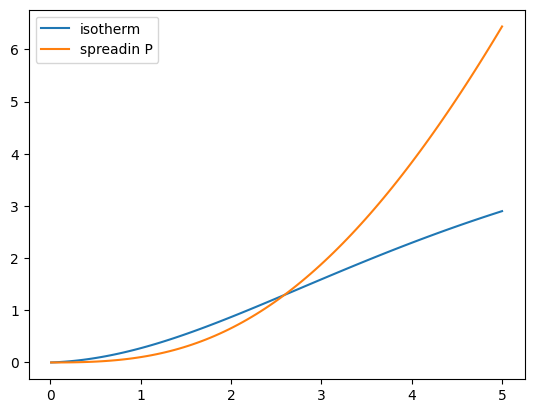

In [4]:
'''
xx=np.linspace(0,1,41)
yy=np.sin(xx)
yy=np.exp(xx)
trapz_res =trapezoid(yy,xx)
simps_res = simpson(yy,xx)
Tru_res = np.exp(1)-1
print('Trapz:   ', trapz_res)
print('Simps:   ', simps_res)
#print('True val:',1/3*1**3)
#print('True val:', np.cos(0)-np.cos(1))
print('True val:', Tru_res)


print('Error:')
print('Trapz:   ', trapz_res-Tru_res)
print('Simps:   ', simps_res-Tru_res)
'''
# =-=-=-=-=-=-=-=-=-=-=-=-= #
# =- Spreading Pressure  -= #
# =-=-=-=-=-=-=-=-=-=-=-=-= #
from scipy.integrate import trapezoid, simpson
def SpreP(iso_pure, P, T):
    if P <= 1E-9 and P >= 0:
        return 0
    P_dom = np.linspace(0,P,41)
    q_dom = iso_pure(P_dom, T)
    P_dom[0]= 1E-8
    within_integ = q_dom/P_dom
    pi_ov_RT = simpson(q_dom,P_dom)
    return pi_ov_RT

pi1 = SpreP(iso1, 5, 300)
print(pi1)

pi1_list = []
P_dom = np.linspace(0.01,5,100)
for pp in P_dom:
    pi1_list.append(SpreP(iso1, pp,300))

plt.plot(P_dom, iso1(P_dom,300), label = 'isotherm')
plt.plot(P_dom, pi1_list, label='spreadin P')
plt.legend()


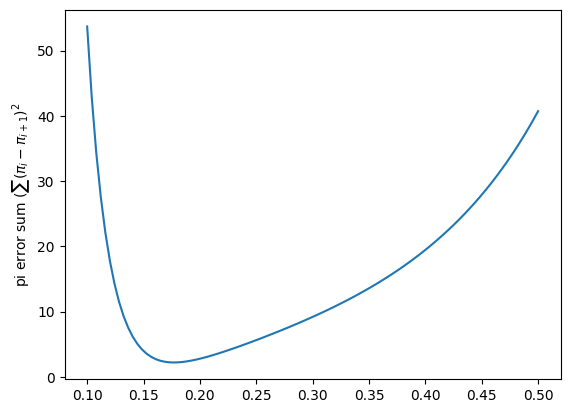

In [5]:
# For given x1, x2, P & T
# Calculate vapor pressure for
# Calculate spreading P

# =-=-=-=-=-=-=-=-=-=-=-=-= #
# =-= Calc vapor P for  =-= #
# =-=Spreading  pressure=-= #
# =-=-=-=-=-=-=-=-=-=-=-=-= #
sigmoid = lambda x: 1 / (1 + np.exp(-x))
logit = lambda x: np.log(x / (1 - x))

def err_SpreP(x_list, iso_list, P_list, T):
    P_ov = np.sum(P_list)
    is_binary = False
    if P_list[0] < 1E-5:
        is_binary = True
        P_list[0] = 0
    if P_list[1] < 1E-5:
        is_binary = True
        P_list[1] = 0
    if P_list[2] < 1E-5:
        is_binary = True
        P_list[2] = 0
    y_list = np.array(P_list)/P_ov
    P_vap_list = []
    pi_list = []
    for pp,xx,iso in zip(P_list, x_list,iso_list):
        P_vap_tmp = pp/(xx+1E-7)
        pi_tmp = SpreP(iso, P_vap_tmp, T)

        P_vap_list.append(P_vap_tmp)
        pi_list.append(pi_tmp)
    err_sum = 0
    for ii in range(len(pi_list)-1):
        err_sum += (pi_list[ii] - pi_list[ii+1])**2

    # DO I REALLY NEED THIS PART AS WELL???
    err_sum += (pi_list[-1] - pi_list[0])**2

    return err_sum

# TEST
iso_list_test = [iso1, iso2, iso3]
P_list_test = [0.5, 1.2, 0.3]
T_test = 300

x3 = 0.1
x1_dom = np.linspace(0.1,0.5,100)
x2_dom = 1-x1_dom-x3

err_sp_res_list = []
for xx1,xx2, in zip(x1_dom, x2_dom):
    err_sum_tmp = err_SpreP([xx1,xx2,x3], iso_list_test, P_list_test, T_test)
    err_sp_res_list.append(err_sum_tmp)

plt.plot(x1_dom, err_sp_res_list)
plt.ylabel('pi error sum ($\sum (\pi_{i} - \pi_{i+1})^{2}$')
plt.show()


0.0024726231566347743
0.9975273768433653


Text(0, 0.5, 'y')

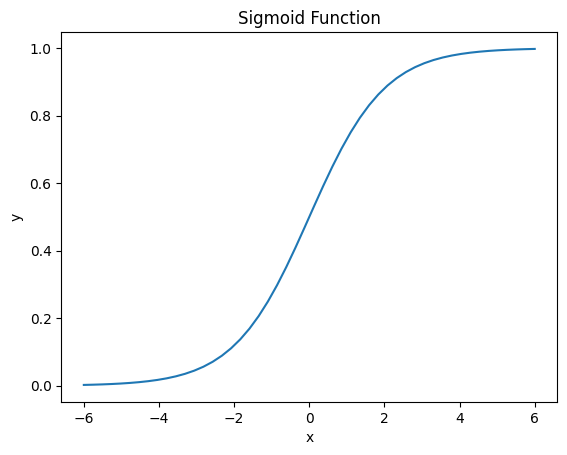

In [7]:
xx = np.linspace(-6,6)
yy = sigmoid(xx)
print(yy[0])
print(yy[-1])
plt.plot(xx,yy)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')

In [17]:
# =-=-=-=-=-=-=-=-=-=-=-=-= #
# =-= Optim. Prob. for  =-= #
# =-= finding x values  =-= #
# =-=-=-=-=-=-=-=-=-=-=-=-= #
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

def obj_fun(ligit_x_no_end, iso_list, P_list, T):
    x_list = []
    for ligitx in ligit_x_no_end:
        x_list.append(sigmoid(ligitx))
    #x_list= list(ligit_x_no_end)
    x_end = 1- np.sum(x_list)
    x_list.append(x_end) # 3rd component
    constr = 0
    if x_end < 0:
        constr += 5E5*x_end**2
    #for xx in x_list:
    #    if xx < 0:
    #        constr += 1E5*xx**2
    #        print(constr)
    err_pi = err_SpreP(x_list, iso_list, P_list, T)
    err_const_sum = err_pi + constr
    return err_const_sum

ligit_x_init = [-0.1, -0.1,]
iso_list_test = [iso1, iso2, iso3]
P_list_test = [0.6, 1.1, 0.3]
#P_list_test = [0.6, 1.1, 0.3]
T_test = 300
err_test = obj_fun(ligit_x_init, iso_list_test, P_list_test, T_test)
#print(err_test)

opt_res1 = differential_evolution(obj_fun, [[-6,6,],]*len(ligit_x_init),
                                  args=(iso_list_test, P_list_test, T_test),
                                  maxiter=10000)

opt_res2 = minimize(obj_fun, opt_res1.x,
                   args=(iso_list_test, P_list_test, T_test),
                    method = 'BFGS')
#opt_res = minimize(obj_fun, opt_res.x,
#                   args=(iso_list_test, P_list_test, T_test),
#                   )
print(opt_res2)
x_res = sigmoid(opt_res2.x)
#x_res = list(opt_res.x)
x_end = 1-np.sum(x_res)
print(list(x_res)+[x_end])
#print(dir(opt_res2))
print(opt_res2.fun)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.127595883936577e-30
        x: [-1.355e+00  1.004e+00]
      nit: 0
      jac: [ 2.587e-06  2.317e-06]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1
[np.float64(0.2050778103459898), np.float64(0.7318402346332562), np.float64(0.06308195502075398)]
5.127595883936577e-30


CPU time:
1.3657774448394775 min


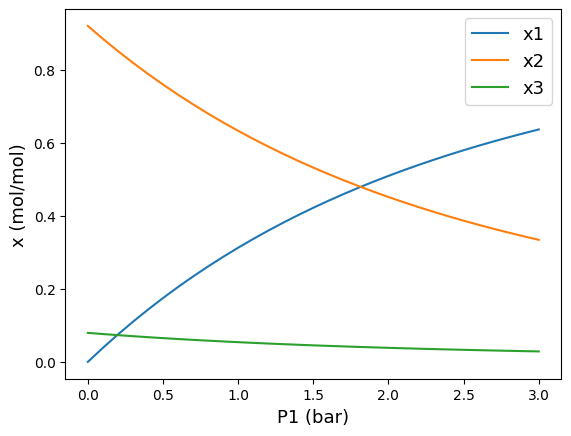

In [11]:
def test_optim_1(P1):
    ligit_x_init = [-0.1, -0.1,]
    iso_list_test = [iso1, iso2, iso3]
    P_list_test = [P1, 1.1, 0.3]
    #P_list_test = [0.6, 1.1, 0.3]
    T_test = 300
    err_test = obj_fun(ligit_x_init, iso_list_test, P_list_test, T_test)
    #print(err_test)

    opt_res1 = differential_evolution(obj_fun, [[-6,6,],]*len(ligit_x_init),
                                    args=(iso_list_test, P_list_test, T_test),
                                    maxiter=1000)

    opt_res2 = minimize(obj_fun, opt_res1.x,
                    args=(iso_list_test, P_list_test, T_test),
                        method = 'BFGS')
    x_res = sigmoid(opt_res2.x)
    #x_res = list(opt_res.x)
    x_end = 1-np.sum(x_res)
    x_found = list(x_res)+[x_end]
    return x_found

P1_ran = np.linspace(0.001,3,31)
import time
tic = time.time()
x1_list = []
x2_list = []
x3_list = []
for pp in P1_ran:
    x_found_tmp = test_optim_1(pp)
    x1_list.append(x_found_tmp[0])
    x2_list.append(x_found_tmp[1])
    x3_list.append(x_found_tmp[2])

plt.plot(P1_ran,x1_list,label='x1')
plt.plot(P1_ran,x2_list,label='x2')
plt.plot(P1_ran,x3_list,label='x3')
plt.legend(fontsize = 13)
plt.xlabel('P1 (bar)',fontsize = 13)
plt.ylabel('x (mol/mol)',fontsize = 13)
toc = time.time()- tic
print("CPU time:")
print(toc/60, 'min')


CPU time:
1.203459127744039 min


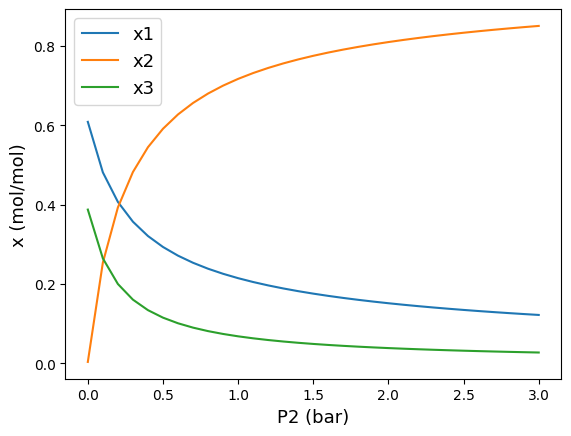

In [12]:
def test_optim_2(P2):
    ligit_x_init = [-0.1, -0.1,]
    iso_list_test = [iso1, iso2, iso3]
    P_list_test = [0.6, P2, 0.3]
    #P_list_test = [0.6, 1.1, 0.3]
    T_test = 300
    err_test = obj_fun(ligit_x_init, iso_list_test, P_list_test, T_test)
    #print(err_test)

    opt_res1 = differential_evolution(obj_fun, [[-6,6,],]*len(ligit_x_init),
                                    args=(iso_list_test, P_list_test, T_test),
                                    maxiter=1000)

    opt_res2 = minimize(obj_fun, opt_res1.x,
                    args=(iso_list_test, P_list_test, T_test),
                        method = 'BFGS')
    x_res = sigmoid(opt_res2.x)
    #x_res = list(opt_res.x)
    x_end = 1-np.sum(x_res)
    x_found = list(x_res)+[x_end]
    return x_found

P2_ran = np.linspace(0.001,3,31)
import time
tic = time.time()
x1_list = []
x2_list = []
x3_list = []
for pp in P2_ran:
    x_found_tmp = test_optim_2(pp)
    x1_list.append(x_found_tmp[0])
    x2_list.append(x_found_tmp[1])
    x3_list.append(x_found_tmp[2])

plt.plot(P2_ran,x1_list,label = 'x1')
plt.plot(P2_ran,x2_list,label = 'x2')
plt.plot(P2_ran,x3_list,label = 'x3')
plt.legend(fontsize = 13)
plt.xlabel('P2 (bar)',fontsize = 13)
plt.ylabel('x (mol/mol)',fontsize = 13)
toc = time.time() - tic
print("CPU time:")
print(toc/60, 'min')


CPU time:
1.488468837738037 min


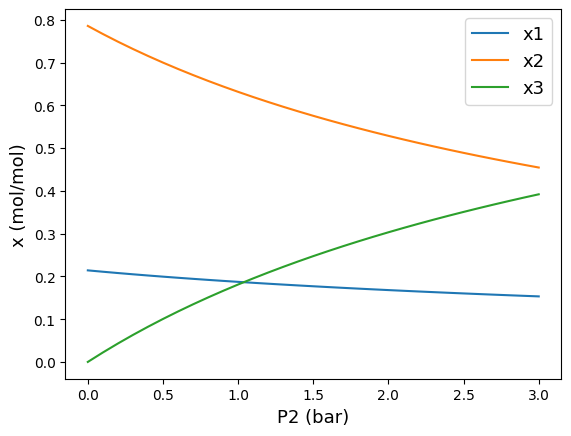

In [13]:
def test_optim_3(P3):
    ligit_x_init = [-0.1, -0.1,]
    iso_list_test = [iso1, iso2, iso3]
    P_list_test = [0.6, 1.1, P3]
    #P_list_test = [0.6, 1.1, 0.3]
    T_test = 300
    err_test = obj_fun(ligit_x_init, iso_list_test, P_list_test, T_test)
    #print(err_test)

    opt_res1 = differential_evolution(obj_fun, [[-6,6,],]*len(ligit_x_init),
                                    args=(iso_list_test, P_list_test, T_test),
                                    maxiter=1000)

    opt_res2 = minimize(obj_fun, opt_res1.x,
                    args=(iso_list_test, P_list_test, T_test),
                        method = 'BFGS')
    x_res = sigmoid(opt_res2.x)
    #x_res = list(opt_res.x)
    x_end = 1-np.sum(x_res)
    x_found = list(x_res)+[x_end]
    return x_found

P3_ran = np.linspace(0.001,3,31)
import time
tic = time.time()
x1_list = []
x2_list = []
x3_list = []
for pp in P3_ran:
    x_found_tmp = test_optim_3(pp)
    x1_list.append(x_found_tmp[0])
    x2_list.append(x_found_tmp[1])
    x3_list.append(x_found_tmp[2])

plt.plot(P3_ran,x1_list, label='x1')
plt.plot(P3_ran,x2_list, label='x2')
plt.plot(P3_ran,x3_list, label='x3')
plt.legend(fontsize = 13)
plt.xlabel('P2 (bar)',fontsize = 13)
plt.ylabel('x (mol/mol)',fontsize = 13)

toc = time.time() - tic
print("CPU time:")
print(toc/60, 'min')


In [20]:
def obj_fun(ligit_x_no_end, iso_list, P_list, T):
    x_list = []
    for ligitx in ligit_x_no_end:
        x_list.append(sigmoid(ligitx))
    #x_list= list(ligit_x_no_end)
    x_end = 1- np.sum(x_list)
    x_list.append(x_end) # 3rd component
    constr = 0
    if x_end < 0:
        constr += 5E5*x_end**2
    #for xx in x_list:
    #    if xx < 0:
    #        constr += 1E5*xx**2
    #        print(constr)
    err_pi = err_SpreP(x_list, iso_list, P_list, T)
    err_const_sum = err_pi + constr
    return err_const_sum


def IAST_tern(P_arr, T, iso_list):
    ligit_x_init = [-0.1, -0.1]
    opt_res1 = differential_evolution(obj_fun, [[-6,6],]*len(ligit_x_init),
                                      args=(iso_list, P_arr, T),
                                      maxiter=1000)
    opt_res2 = minimize(obj_fun, opt_res1.x,
                        args =(iso_list, P_arr, T,),
                        method = 'BFGS')
    x_res = sigmoid(opt_res2.x)
    # if opt_res2.fun is too big?
    x_end = 1-np.sum(x_res)
    x_list = list(x_res)+[x_end]
    # if x < 0 ?? or
    P_vap_list = np.array(P_arr)/(np.array(x_list)+1E-7)
    q_not_list = []
    x_ov_q_list = []
    for iso, pp,xx in zip(iso_list, P_vap_list, x_list):
        q_tmp = iso(pp, T)
        x_ov_q_tmp = xx/q_tmp
        q_not_list.append(q_tmp)
        x_ov_q_list.append(x_ov_q_tmp)
    q_tot = 1/np.sum(x_ov_q_list)
    q_arr = np.array(x_list)*q_tot
    return q_arr

iso_list_test = [iso1, iso2, iso3]
P_list_test = [0.2, 0.3, 1]
T_test = 400
q_arr_test = IAST_tern(P_list_test, T_test, iso_list_test)
print(q_arr_test, 'mol/kg')




[0.01991322 0.12268484 0.14973709] mol/kg
